In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data=pd.read_csv('housec5.csv')
data

,24,0,40
0,24,0,48
1,24,8,40
2,24,16,40
3,32,0,48
4,32,8,40
...,...,...,...
1831,224,240,216
1832,224,240,224
1833,232,232,224
1834,232,240,216


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

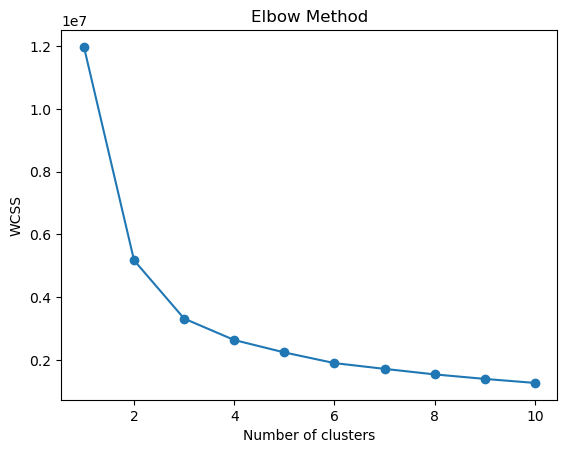

In [27]:
# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss , marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




In [28]:
k =  3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=0)

In [29]:
clusters = kmeans.labels_

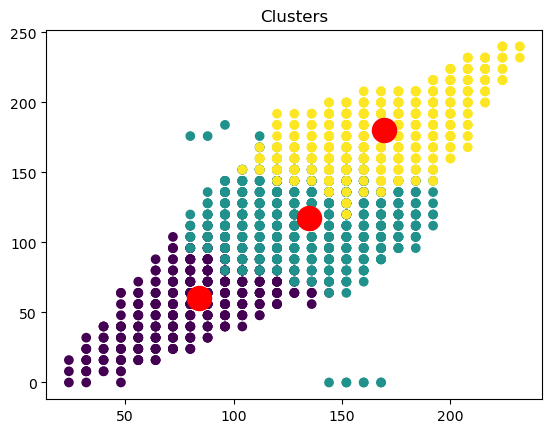

In [30]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clusters')

plt.show()

In [31]:
sse = kmeans.inertia_
print("Sum of Squared Error (SSE):", sse)

Sum of Squared Error (SSE): 3318367.90223293


In [45]:
# Perform k-means clustering with Euclidean distance
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=0)

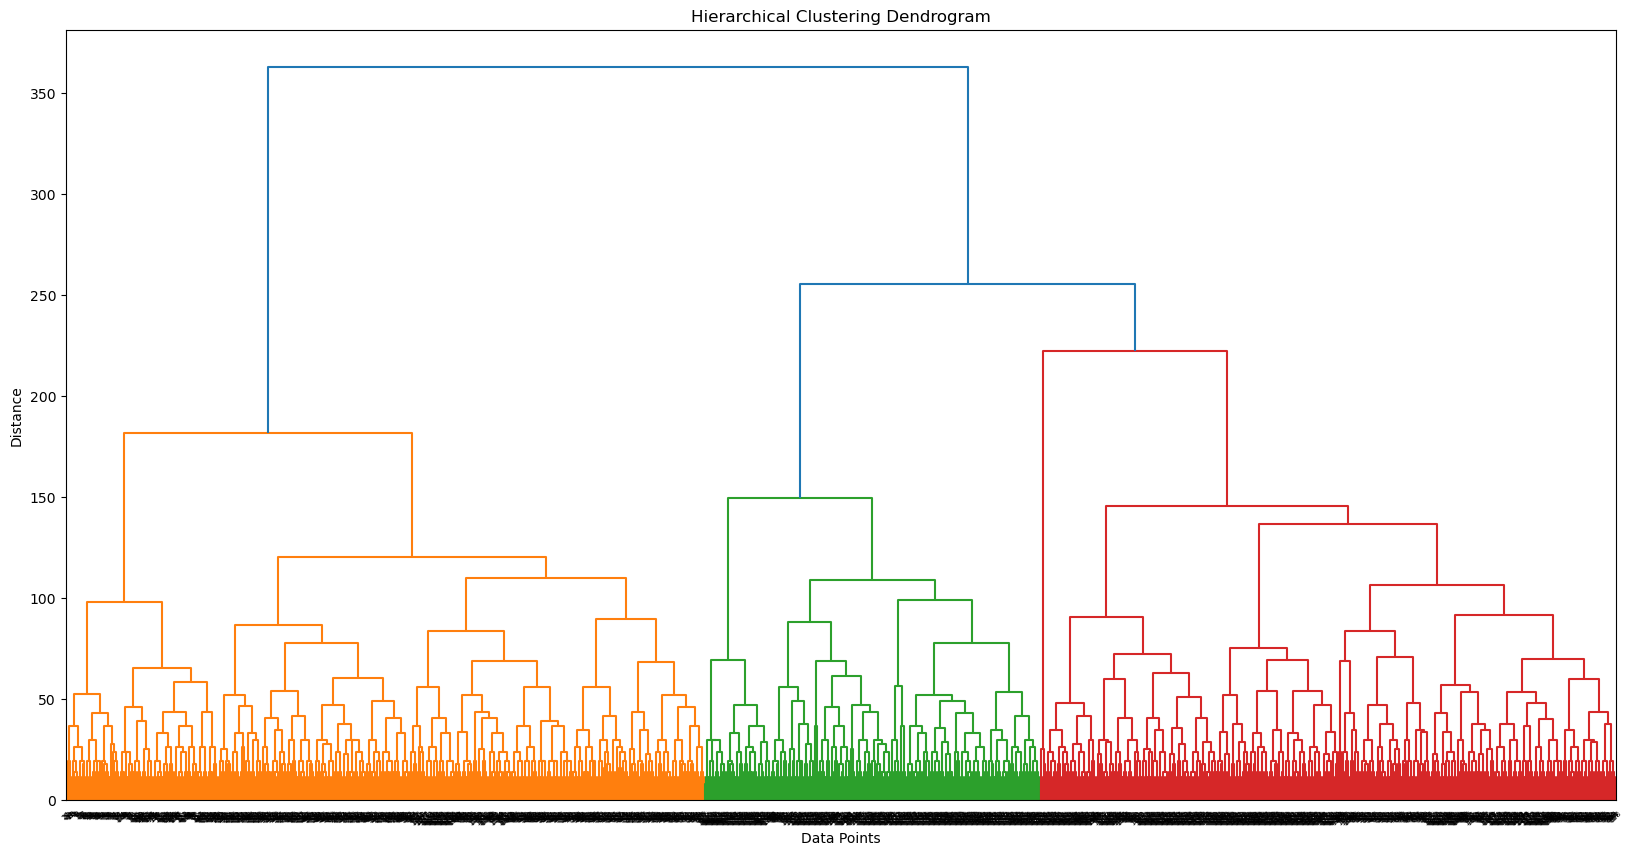

In [38]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Calculate pairwise distances using Euclidean distance
distances = pdist(data, metric='euclidean')

# Perform hierarchical clustering using complete linkage
hc_complete = linkage(distances, method='complete')

# Plot the dendrogram with rotated x-axis labels
plt.figure(figsize=(20, 10)) 
dendrogram(hc_complete)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.xticks(rotation=45)  
plt.show()



In [37]:
# Split dataset into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Perform k-means clustering on the training set
kmeans = KMeans(n_clusters=3, random_state=42)  # assuming you determined 3 clusters using the elbow method
kmeans.fit(train_data)

# Calculate SSE for the test set using Euclidean distance
sse_test = np.sum((test_data - kmeans.cluster_centers_[kmeans.predict(test_data)]) ** 2)

print("SSE for test set with Euclidean distance:", sse_test)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


SSE for test set with Euclidean distance: 24    242215.333776
0     216348.602204
40    205260.942476
dtype: float64


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


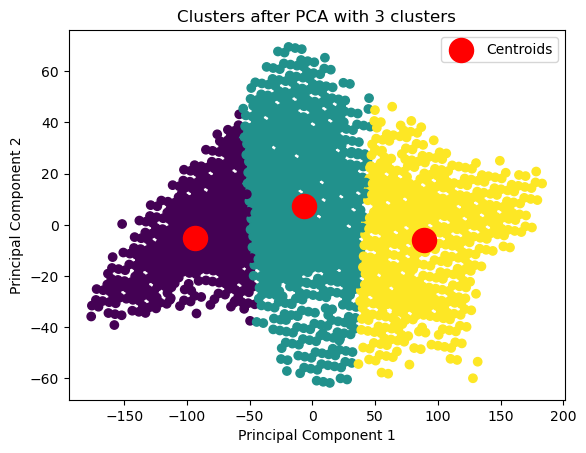

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#PCA TASK

# Apply PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

# Perform k-means clustering with 3 clusters
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_pca)
clusters = kmeans.labels_

# Visualize clusters on PCA-transformed data
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters after PCA with 3 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


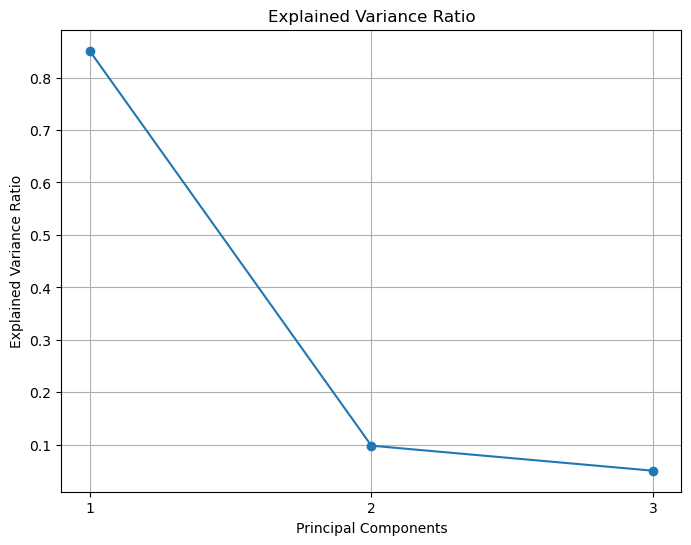

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#principal components AND their contributions to the variance in the data.

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


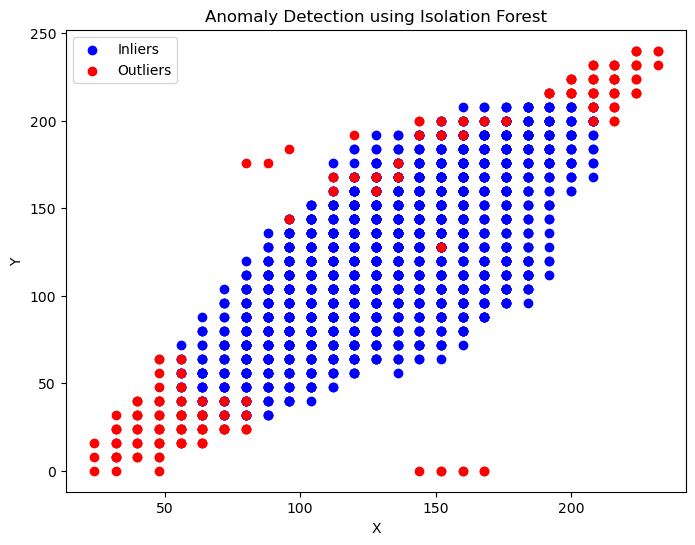

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

#Anomaly Detection TASK  using Isolation Forest


# Fit Isolation Forest model
clf = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination based on expected outlier rate
clf.fit(data)

# Predict outliers
outliers = clf.predict(data)

# Extract outliers and inliers
outlier_indices = np.where(outliers == -1)[0]
inlier_indices = np.where(outliers == 1)[0]

# Visualize outliers and inliers in the feature space
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[inlier_indices, 0], data.iloc[inlier_indices, 1], c='blue', label='Inliers')
plt.scatter(data.iloc[outlier_indices, 0], data.iloc[outlier_indices, 1], c='red', label='Outliers')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


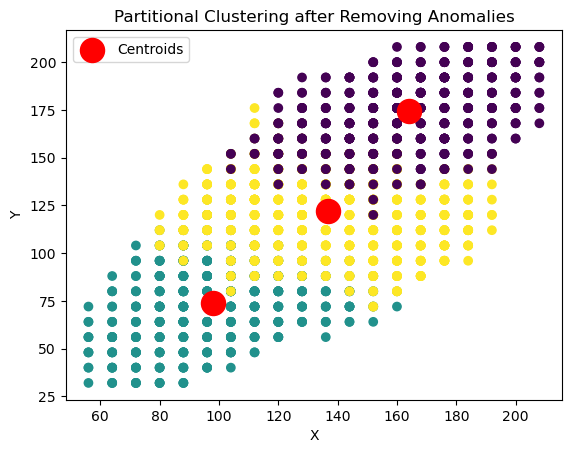

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

#Partitional Clustering after Removing Anomalies

# Fit Isolation Forest model
clf = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination based on expected outlier rate
clf.fit(data)

# Predict outliers
outliers = clf.predict(data)

# Identify inliers
inliers_data = data[outliers == 1]

# Perform k-means clustering on inliers data
k = 3  # number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(inliers_data)
clusters = kmeans.labels_

# Visualize clusters
plt.scatter(inliers_data.iloc[:, 0], inliers_data.iloc[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Partitional Clustering after Removing Anomalies')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
